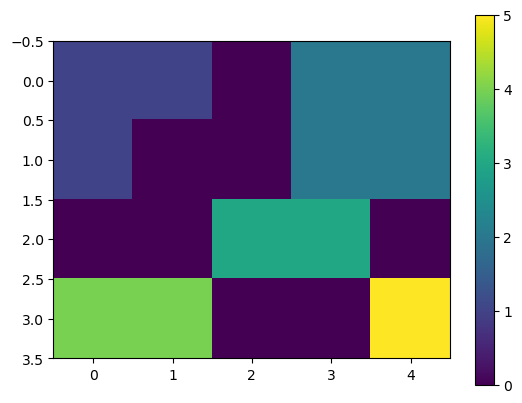

{0: array([5., 2.]), 1: array([3.]), 2: array([4.]), 3: array([2.]), 4: array([2.]), 5: array([], dtype=float64)}


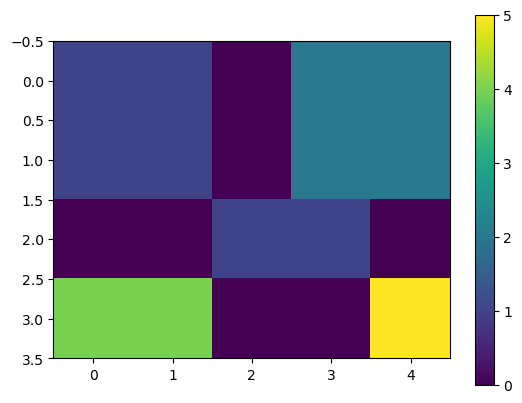

{0: array([2., 2., 2.]), 1: array([4., 2.]), 2: array([4.]), 4: array([2.]), 5: array([], dtype=float64)}
{0: [3, 2.0, 0.0], 1: [2, 3.0, 1.0], 2: [1, 4.0, 0.0], 4: [1, 2.0, 0.0], 5: [0, 0, 0]}
(4, 5)


In [26]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

def cluster_finder(mask):
    """This function has as imput a binary matrix of one population group
       and returns the size of cluster(s).

    Args:
        mask (2D numpy array): Matrix of intergers where 0 is not part of a cluster
        and 1 is part of a cluster.

    Returns:
        cluster: an array of clusters sizes for a input population group (mask)
    """
    # Labels the clusters
    lw, _ = sp.ndimage.label(mask)

    # sums the agents that are part of a cluster
    clusters = sp.ndimage.sum(mask, lw, index=np.arange(lw.max() + 1))
    return clusters[clusters >= 2]

def find_cluster_sizes(grid):
    """This function finds all the cluster size(s) for all the populations on the 2D grid.

    Args:
        array (2D numpy array): Matrix of intergers where 0 is the empty space
                                and the other intergers a population agent.

    Returns:
        cluster_sizes (dictonary): The keys are the population value (population group)
                                   and the values is an array of cluster size(s).
    """
    unique_values = np.unique(grid)
    cluster_sizes = {}

    for value in unique_values:
        # value 0 is an empty space thus not part of the cluster.
        if value >= 0:
            # Isolate the selected population group form the rest (makt it a binary matrix)
            mask = grid == value
            # find the cluster size(s) for the selected population group.
            cluster_sizes[value] = cluster_finder(mask)
    return cluster_sizes

def cluster_analysis(cluster_sizes):
    """This function calculates the number of clusters, mean cluster size 
       with standard deviation.

    Args:
        cluster_sizes (dictonary): The keys are the population value (population group)
                                   and the values is an array of cluster size(s).

    Returns:
        cluster_data (dictonary): The keys are the population value (population group)
                                  and the values is an array of number of clusters,
                                  mean cluster size and standard deviation.
    """
    cluster_data = {}
    for value in cluster_sizes.keys():
        if len(cluster_sizes[value]) != 0:
            cluster_data[value] = [len(cluster_sizes[value]), np.mean(cluster_sizes[value]),
                                    np.std(cluster_sizes[value])]
        else:
            cluster_data[value] = [len(cluster_sizes[value]), 0, 0]
    return cluster_data

# Example usage
grid = np.array([[1, 1, 0, 2, 2],
                  [1, 0, 0, 2, 2],
                  [0, 0, 3, 3, 0],
                  [4, 4, 0, 0, 5]])

cluster_sizes = find_cluster_sizes(grid)
plt.imshow(grid)
plt.colorbar()
plt.show()
print(cluster_sizes)

# Example usage
N = 100
# array = np.random.randint(1, 5, size=(N, N))

grid = np.array([[1, 1, 0, 2, 2],
                  [1, 1, 0, 2, 2],
                  [0, 0, 1, 1, 0],
                  [4, 4, 0, 0, 5]])

cluster_sizes = find_cluster_sizes(grid)
plt.imshow(grid)
plt.colorbar()
plt.show()
print(cluster_sizes)

cluster_data = cluster_analysis(cluster_sizes)
print(cluster_data)
print(grid.shape)

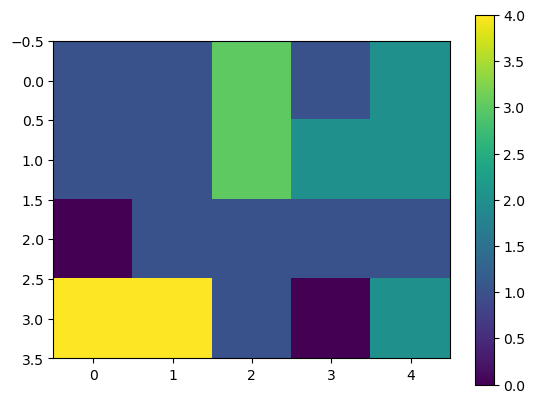

{0: [False, False], 1: [True, True], 2: [False, False], 3: [False, False], 4: [False, False]}
True


c:\Users\jonat\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


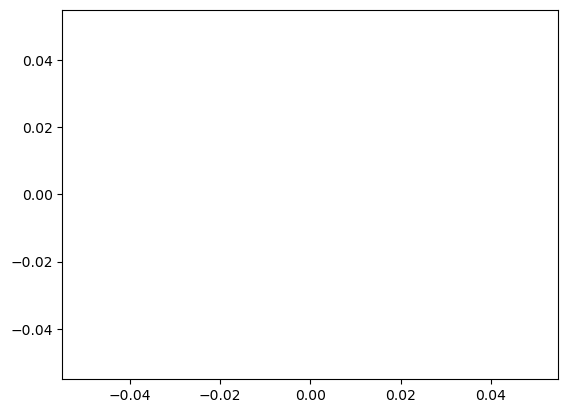

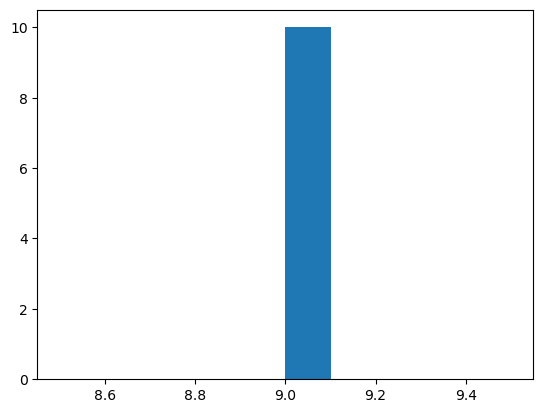

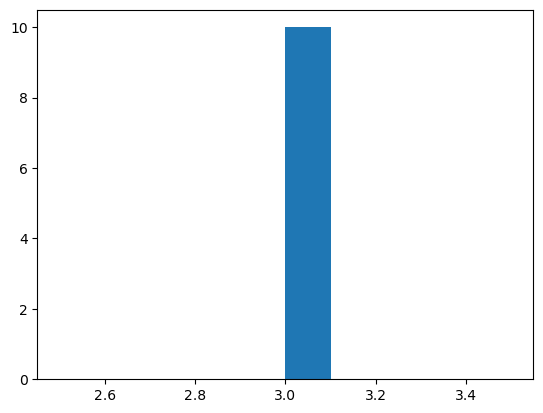

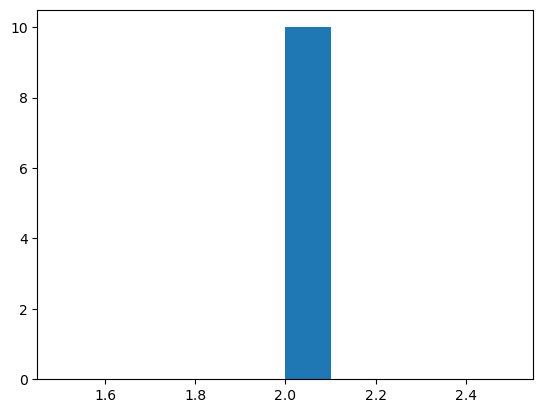

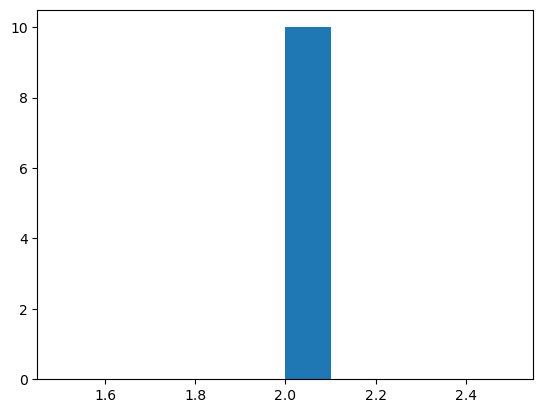

In [27]:
def percolation_detector(grid):
    """This function checks if a population group contains a cluster that percolates,
        either vertically, horizontally or both.

    Args:
        array (2D numpy array): Matrix of intergers where 0 is the empty space
                                and the other intergers a population agent.

    Returns:
        percolation_check (dictonary): The keys are the population value (population group)
                                       and the values is an array of boolian values. 
                                       The first vertical percolation and the second horizontal.
    """
    # Get the number of populations
    unique_values = np.unique(grid)
    percolation_check = {}

    # Loop through each population group and determines the cluster(s) and their sizes.
    for value in unique_values:
        if value >= 0:
            mask = grid == value
            labels, num_clusters = sp.ndimage.label(mask)
            clusters = sp.ndimage.sum(mask, labels, index=np.arange(labels.max() + 1))
            percolates_vertically = False
            percolates_horizontally = False

            # Loop through each cluster of a single poplulation group and check if it percolates
            # If the cluster is not big enough to percolate or if a previous cluster already percolated the check is skipped.
            for label in range(1,num_clusters+1):
                if percolates_vertically == False and clusters[label] >= mask.shape[0]:
                    if label in labels[0,:] and label in labels[-1,:]:
                        percolates_vertically = True
                
                if percolates_horizontally == False  and clusters[label] >= mask.shape[1]:
                    if label in labels[:,0] and label in labels[:,-1]:
                        percolates_horizontally = True

            percolation_check[value] = [percolates_vertically, percolates_horizontally]

    return percolation_check

# Example usage
grid = np.array([[1, 1, 3, 1, 2],
                  [1, 1, 3, 2, 2],
                  [0, 1, 1, 1, 1],
                  [4, 4, 1, 0, 2]])

results = percolation_detector(grid)
plt.imshow(grid)
plt.colorbar()
plt.show()
print(results)


cluster_sizes = find_cluster_sizes(grid)
print(any([any(cluster_sizes[value]) for value in cluster_sizes.keys()]))

for value in cluster_sizes.keys():
    plt.hist(cluster_sizes[value], density=True)
    plt.show()

In [28]:
alpha = 20
y = 1
X = np.arange(0,2+0.05,0.05)
test = []

for x in X:
    if y * (1 - alpha / 100) <= x <= y * (1 + alpha / 100):
        test.append(1)
    elif x < y * (1 - alpha / 100)  or y * x > (1 - alpha / 100):
        test.append(0)

print(test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
a1 = 80
a2 = -2
b1 = 4
b2 = -18
c1 = 1
c2 = 50

y1 = [a1*x + b1 + np.random.rand() * c1 for x in range(20)]
y2 = [a2*x + b2 + np.random.rand() * c2 for x in range(20)]


corr_coeff = np.corrcoef(y1,y2)[0,1]
print(corr_coeff)

-0.548517192089087


In [ ]:
import itertools


# for value in model.cluster_sizes.keys():
#     plt.hist(model.cluster_sizes[value],bins=100, density=True)
#     plt.show()

segg_cluster = list(itertools.chain.from_iterable(model.cluster_sizes.values()))
plt.hist(segg_cluster,bins=20, density=False)
plt.show()

# Extract data from model
x_coords = np.array([agent.pos[0] for agent in model.schedule.agents])  # Agent x coords
y_coords = np.array([agent.pos[1] for agent in model.schedule.agents])  # Agent y coords
wealths = np.array([agent.wealth for agent in model.schedule.agents])   # Agent wealths 
array = pd.DataFrame({'x_pos': x_coords, 'y_pos': y_coords, 'wealth': wealths}).to_numpy()

cluster_sizes = model.find_cluster_sizes(array)
# for value in cluster_sizes.keys():
#     clusters = 
#     plt.hist(model.cluster_sizes[value],bins=100, density=True)
#     plt.show()

wealth_cluster = list(itertools.chain.from_iterable(cluster_sizes.values()))
plt.hist(wealth_cluster,bins=20, density=False)
plt.show()